In [165]:
# imports
%matplotlib inline
import matplotlib as plt
import numpy as np
import pandas as pd
import collections
import cv2

from scipy import ndimage
import skimage
from skimage import io, img_as_ubyte
from skimage.feature import peak_local_max


### Read a neuropil image

In [271]:
# reading lowerneuropil.tif using tifffile package of skimage

neuropil = io.imread('57F07\I01\LowerNeuropil_57F07_001.tif')

In [272]:
neuropil.shape

(101, 273, 507)

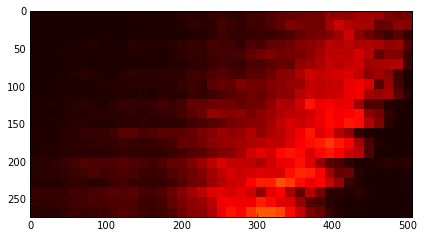

In [273]:
# display of frames of lower neuropil with colormap = hot

io.imshow(neuropil[56], cmap = 'hot')

### Finding the brightest region in a frame

In [274]:
"""
apply a Gaussian blur to the image then find the brightest region
"""
def getFiringRegion(neuropil_frame):
    #test_image = neuropil[56]
    gray = cv2.GaussianBlur(neuropil_frame, (13,13),0)
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(gray)
    #image = orig.copy()
    cv2.circle(neuropil_frame, maxLoc, 5, (255, 0, 0), 2)
    #print(maxLoc)
    # display the results of our newly improved method
    #cv2.imshow("Robust", test_image)
    #cv2.waitKey(0)
    return maxLoc[1], neuropil_frame

In [275]:
"""
iterate over neuropil frames and call 'getFiringRegion' method to get the slice in which firing occurs.

Create a image which has all firings marked as 'circle' in each frame
"""
firing_Location_list = np.zeros((neuropil.shape[0]))
firing_image = np.zeros(((neuropil.shape[0]), neuropil.shape[1], neuropil.shape[2]), dtype = np.uint8)
for frame in range(0,neuropil.shape[0]):
    current_frame = neuropil[frame]
    #print(current_frame.shape)
    firing_Location_list[frame],firing_image[frame] = getFiringRegion(current_frame)

In [276]:
io.imsave('57F07\I01\Firing_image_01.tif',firing_image)

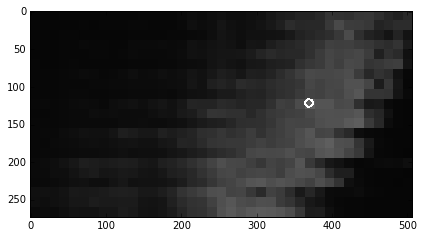

In [277]:
io.imshow(firing_image[12])

In [278]:
type(firing_Location_list)

numpy.ndarray

### Finding the slice in which firing occured in full video

In [279]:
_list = []
for frame in range(0,firing_image.shape[0]):
    #slice1 = temp[0:39]
    #slice2 = temp[39:78]
    #slice3 = temp[78:117]
    #slice4 = temp[117:156]
    #slice5 = temp[156:195]
    #slice6 = temp[195:234]
    #slice7 = temp[234:273]
    
    # check for the position of firing in frame
    if firing_Location_list[frame] in range(0,39+1):
        #print("slice1")
        _list.append(1)
        #print(_list)
    elif firing_Location_list[frame] in range(39,78+1):
        #print("slice2")
        _list.append(2)
        #print(_list)
    elif firing_Location_list[frame] in range(78,117+1):
        #print("slice3")
        _list.append(3)
        #print(_list)
    elif firing_Location_list[frame] in range(117,156+1):
        #print("slice4")
        _list.append(4)
        #print(_list)
    elif firing_Location_list[frame] in range(156,195+1):
        #print("slice5")
        _list.append(5)
        #print(_list)
    elif firing_Location_list[frame] in range(195,234+1):
        #print("slice6")
        _list.append(6)
        #print(_list)
    elif firing_Location_list[frame] in range(234,273+1):
        #print("slice7")
        _list.append(7)
        #print(_list)

In [280]:
# transform the list in such a way that it shows number of occurences of each digit until a new digit occurs

firing = np.asarray(_list)

In [281]:
# list of slices wrt firings in each frame
firing

array([4, 7, 4, 7, 4, 7, 7, 7, 4, 7, 7, 4, 4, 3, 7, 5, 4, 5, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 4, 5, 4, 5, 4, 5, 5, 6, 7, 6,
       7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 4, 7, 4, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7])

### Number of occurences of Firings in a slice [frame, slice, count of firings in slice] 

In [282]:
"""
Working solution to find the number of frames a firing lasted in slice-n
"""
current_slice = firing[0]
current_count = 0
list_of_firings = []

for x in range(0,len(firing)):

    if firing[x] == current_slice:
        current_count +=1
        if x == len(firing)-1:
            frame_number = (x-current_count)+1
            list_of_firings.append([frame_number, current_slice,current_count])
    
    else:
        frame_number = (x-current_count)+1
        list_of_firings.append([frame_number, current_slice,current_count])
        current_count = 1
        current_slice = firing[x]
        
print(list_of_firings)


[[1, 4, 1], [2, 7, 1], [3, 4, 1], [4, 7, 1], [5, 4, 1], [6, 7, 3], [9, 4, 1], [10, 7, 2], [12, 4, 2], [14, 3, 1], [15, 7, 1], [16, 5, 1], [17, 4, 1], [18, 5, 1], [19, 7, 16], [35, 6, 1], [36, 7, 1], [37, 4, 1], [38, 5, 1], [39, 4, 1], [40, 5, 1], [41, 4, 1], [42, 5, 2], [44, 6, 1], [45, 7, 1], [46, 6, 1], [47, 7, 2], [49, 6, 1], [50, 7, 23], [73, 4, 1], [74, 7, 1], [75, 4, 1], [76, 6, 1], [77, 7, 1], [78, 6, 1], [79, 7, 7], [86, 6, 1], [86, 7, 15]]


In [283]:
list_of_firings[-1]

[86, 7, 15]

### Wave Detection 

In [284]:
#new
_columns = ['Firing Time', 'End Time', 'Duration of Firing', 'Start Slice', 'End Slice', 'Number of slices covered', 'Direction', 'Firing Type']
firing_df = pd.DataFrame(columns = _columns) # create dataframe

temp = []

#status takes three values 'A->P' and 'P->A' and 'non-firing'
status = ""
direction = ""

for x in range(0, len(list_of_firings)):
    
    #if x+1 == len(list_of_firings):
    #    print(list_of_firings[x])
    
    #print(x+1)
    if x+1 < len(list_of_firings):
        #print(x+1)
        #print(x,x+1)
        
        #decreasing case where difference is 1
        if (list_of_firings[x][1] - list_of_firings[x+1][1]) == 1:
            status = 'Wave'
            direction = 'A->P'
            
            #print(list_of_firings[x])
            temp.append(list_of_firings[x])
            temp.append(list_of_firings[x+1])

            
            if (list_of_firings[x+1][1] - list_of_firings[x+2][1]) == -1:
                if(len(temp)>0):
                    #print(status)
                    newrow = [temp[0][0], (temp[-1][0] + temp[-1][2] - 1), ((temp[-1][0] + temp[-1][2]) - temp[0][0] ), temp[0][1], temp[-1][1], len(temp), direction, status]
                    firing_df = firing_df.append(pd.Series(newrow, index = _columns), ignore_index=True)
                    print(status, '=' , temp)
                    #temp.clear()
                    del temp[:]
                #last element check
                if(x+3 == len(list_of_firings)):
                    temp.append(list_of_firings[x+1])
                    temp.append(list_of_firings[x+2])
                    newrow = [temp[0][0], (temp[-1][0] + temp[-1][2] - 1), ((temp[-1][0] + temp[-1][2]) - temp[0][0] ), temp[0][1], temp[-1][1], len(temp), direction, status]
                    firing_df = firing_df.append(pd.Series(newrow, index = _columns), ignore_index=True)
                    print(status, '=' , temp)
                    del temp[:]

        #increasing case where difference is -1
        elif (list_of_firings[x][1] - list_of_firings[x+1][1]) == -1:
            
            status = 'Wave'
            direction = 'P->A'
            
            #print(list_of_firings[x])

            temp.append(list_of_firings[x])


            if(x+1 < len(list_of_firings)-1):
                if (list_of_firings[x+1][1] - list_of_firings[x+2][1]) != -1:
                    temp.append(list_of_firings[x+1])
                    newrow = [temp[0][0], (temp[-1][0] + temp[-1][2] - 1), ((temp[-1][0] + temp[-1][2]) - temp[0][0] ), temp[0][1], temp[-1][1], len(temp), direction, status]
                    firing_df = firing_df.append(pd.Series(newrow, index = _columns), ignore_index=True)
                    print(status,"=",temp)
                    del temp[:]
                    
                                 

                if (list_of_firings[x+1][1] - list_of_firings[x+2][1]) == 1:
                    if(len(temp)>0):
                        newrow = [temp[0][0], (temp[-1][0] + temp[-1][2] - 1), ((temp[-1][0] + temp[-1][2]) - temp[0][0] ), temp[0][1], temp[-1][1], len(temp), direction, status]
                        firing_df = firing_df.append(pd.Series(newrow, index = _columns), ignore_index=True)
                        print(status, '=' , temp)

                        #temp.clear()
                        del temp[:]
                        
                    #last element check
                    if(x+3 == len(list_of_firings)):
                        temp.append(list_of_firings[x+1])
                        temp.append(list_of_firings[x+2])
                        newrow = [temp[0][0], (temp[-1][0] + temp[-1][2] - 1), ((temp[-1][0] + temp[-1][2]) - temp[0][0] ), temp[0][1], temp[-1][1], len(temp), direction, status]
                        firing_df = firing_df.append(pd.Series(newrow, index = _columns), ignore_index=True)
                        print(status, '=' , temp)
                        del temp[:]


        #non wave case where difference is greater than or equal to 2               
        elif abs(list_of_firings[x][1] - list_of_firings[x+1][1]) >= 2:
            if (list_of_firings[x][1] - list_of_firings[x-1][1]) != 1:


                status = 'non-wave'
                direction = 'NAN'
                temp.append(list_of_firings[x])
                newrow = [temp[0][0], (temp[-1][0] + temp[-1][2] - 1), ((temp[-1][0] + temp[-1][2]) - temp[0][0] ), temp[0][1], temp[-1][1],len(temp), direction, status]
                firing_df = firing_df.append(pd.Series(newrow, index = _columns), ignore_index=True)
                print(status, '=', temp)
                del temp[:]

           
       
        
    
    

non-wave = [[1, 4, 1]]
non-wave = [[2, 7, 1]]
non-wave = [[3, 4, 1]]
non-wave = [[4, 7, 1]]
non-wave = [[5, 4, 1]]
non-wave = [[6, 7, 3]]
non-wave = [[9, 4, 1]]
non-wave = [[10, 7, 2]]
non-wave = [[12, 4, 2], [14, 3, 1], [14, 3, 1]]
non-wave = [[15, 7, 1]]
Wave = [[16, 5, 1], [17, 4, 1]]
Wave = [[17, 4, 1], [18, 5, 1]]
Wave = [[19, 7, 16], [35, 6, 1]]
Wave = [[35, 6, 1], [36, 7, 1]]
Wave = [[37, 4, 1], [38, 5, 1]]
Wave = [[38, 5, 1], [39, 4, 1]]
Wave = [[39, 4, 1], [40, 5, 1]]
Wave = [[40, 5, 1], [41, 4, 1]]
Wave = [[41, 4, 1], [42, 5, 2], [44, 6, 1], [45, 7, 1]]
Wave = [[45, 7, 1], [46, 6, 1]]
Wave = [[46, 6, 1], [47, 7, 2]]
Wave = [[47, 7, 2], [49, 6, 1]]
Wave = [[49, 6, 1], [50, 7, 23]]
non-wave = [[73, 4, 1]]
non-wave = [[74, 7, 1]]
non-wave = [[75, 4, 1]]
Wave = [[76, 6, 1], [77, 7, 1]]
Wave = [[77, 7, 1], [78, 6, 1]]
Wave = [[78, 6, 1], [79, 7, 7]]
Wave = [[79, 7, 7], [86, 6, 1]]
Wave = [[86, 6, 1], [86, 7, 15]]


### Summary of detected waves / non-waves

In [285]:
firing_df

,Firing Time,End Time,Duration of Firing,Start Slice,End Slice,Number of slices covered,Direction,Firing Type
0,1.0,1.0,1.0,4.0,4.0,1.0,NAN,non-wave
1,2.0,2.0,1.0,7.0,7.0,1.0,NAN,non-wave
2,3.0,3.0,1.0,4.0,4.0,1.0,NAN,non-wave
3,4.0,4.0,1.0,7.0,7.0,1.0,NAN,non-wave
4,5.0,5.0,1.0,4.0,4.0,1.0,NAN,non-wave
5,6.0,8.0,3.0,7.0,7.0,1.0,NAN,non-wave
6,9.0,9.0,1.0,4.0,4.0,1.0,NAN,non-wave
7,10.0,11.0,2.0,7.0,7.0,1.0,NAN,non-wave
8,12.0,14.0,3.0,4.0,3.0,3.0,NAN,non-wave
9,15.0,15.0,1.0,7.0,7.0,1.0,NAN,non-wave


### Convert dataframe to csv

In [286]:
firing_df.to_csv('57F07\I01\I01.csv', sep = ',')

In [208]:
firing_df.loc[(firing_df['Firing Type'] == 'Wave') & (firing_df['Number of slices covered'] > 2)]

,Firing Time,End Time,Duration of Firing,Start Slice,End Slice,Number of slices covered,Direction,Firing Type
18,41.0,45.0,5.0,4.0,7.0,4.0,P->A,Wave
